<a href="https://colab.research.google.com/github/akr1139/FYP/blob/main/ML_Model_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
url="https://raw.githubusercontent.com/akr1139/FYP/main/gas_dataset.csv"
#https://raw.githubusercontent.com/akr1139/FYP/main/gas_dataset.csv
data=pd.read_csv(url,encoding='latin-1')
data.head(3)

,data_num,MQ7,MQ2,MQ4,MQ5,MQ5.1,MQ3,Label
0,1,92,50,94,83,87,68,1
1,2,92,50,95,83,86,68,1
2,3,92,50,94,82,88,68,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   data_num  7100 non-null   int64
 1   MQ7       7100 non-null   int64
 2   MQ2       7100 non-null   int64
 3   MQ4       7100 non-null   int64
 4   MQ5       7100 non-null   int64
 5   MQ5.1     7100 non-null   int64
 6   MQ3       7100 non-null   int64
 7   Label     7100 non-null   int64
dtypes: int64(8)
memory usage: 443.9 KB


In [4]:
data = data.drop(columns=['data_num'])

In [5]:
X=data.drop('Label',axis=1)
y=data['Label']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
X_train.shape

(4970, 6)

In [8]:
X_test.shape

(2130, 6)

In [9]:
def model_acc(model):
  model.fit(X_train,y_train)
  acc=model.score(X_test,y_test)
  print(str(model)+' --> '+str(acc))

In [10]:
data.isnull().sum()

MQ7      0
MQ2      0
MQ4      0
MQ5      0
MQ5.1    0
MQ3      0
Label    0
dtype: int64

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import HistGradientBoostingClassifier

lr=LinearRegression()
ls=Lasso()
ds=DecisionTreeRegressor()
rf=RandomForestRegressor()

# hgbc=HistGradientBoostingClassifier()
model_acc(lr)
model_acc(ls)
model_acc(ds)
model_acc(rf)
# model_acc(hgbc)

LinearRegression() --> 0.806385037609921
Lasso() --> 0.6185103431993166
DecisionTreeRegressor() --> 0.9718714796875114
RandomForestRegressor() --> 0.9837318684761799


## Hyperparameter tunning

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_
best_model

RandomForestRegressor(criterion='absolute_error')

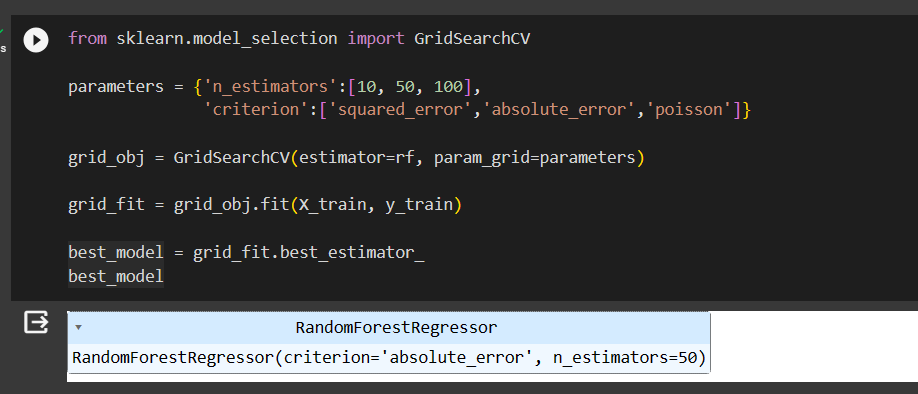

In [13]:
best_model.score(X_test,y_test)

0.9843783892951395

In [14]:
X_test.columns

Index(['MQ7', 'MQ2', 'MQ4', 'MQ5', 'MQ5.1', 'MQ3'], dtype='object')

In [15]:
import pickle
with open('predictor.pickle','wb') as file:
  pickle.dump(best_model,file)

In [16]:
best_model.predict([[100,100,100,100,100,100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.77])

image.png

In [17]:
best_model.predict([[168,93,88,88,77,180]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.37])

image.png

In [18]:
best_model.predict([[135,72,99,83,85,153]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.97])

image.png

In [19]:
best_model.predict([[132,66,95,83,85,145]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.73])

image.png

In [20]:
best_model.predict([[112,57,95,81,84,118]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.])

image.png

In [21]:
best_model.predict([[101,54,94,83,83,68]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.])

208 102 108 85 75 152

In [22]:
best_model.predict([[208,102,108,85,75,152]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.94])

104 65 79 75 76 98

In [23]:
best_model.predict([[104,65,79,75,76,98]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.25])

104 56 81 77 77 95

In [24]:
best_model.predict([[104,56,81,77,77,95]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.46])

98 52 79 74 77 81

In [25]:
best_model.predict([[98,52,79,74,77,81]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.32])